# Gradient Boosting Machines

**Boosting** 

Combine weak learners to build a strong model

How does this work?

Build a base model:

`Y = Model1(x) + Error1`

Models are abstractions. There will be error between predictions and actual

What is this error can be modeled ? Say:

`Error1 = Model2(x) + Error2`

If modeled right, this will improve the accuracy of the predictions.

And we can continue:

`Error2 = Model3(x) + Error3`

Combining these three steps, we have:

`Y = Model1(x) + Model2(x) + Model3(x) + Error3`

And if we find weights(parameters) for these models?

$$ Y = \alpha Model1(x) + \beta Model2(x) + \gamma Model3(x) + Error3$$

### Intuition

![](img/boost1.png)

### AdaBoost

AdaBoost is done using decision stump

**Exercise**

Run `sklearn.ensemble.AdaBoostClassifier`

`xgboost`

In [5]:
import xgboost as xgb
import pandas as pd
import numpy as np

In [6]:
#Read the data
df = pd.read_csv("data/historical_loan.csv")

# refine the data
df.years = df.years.fillna(np.mean(df.years))

#Load the preprocessing module
from sklearn import preprocessing
categorical_variables = df.dtypes[df.dtypes=="object"].index.tolist()
for i in categorical_variables:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(df[i]))
    df[i] = lbl.transform(df[i])

In [11]:
df.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,1,2.0,3,19200.0,24
1,1,6500,0,2.0,0,66000.0,28
2,0,2400,0,2.0,3,60000.0,36
3,0,10000,2,3.0,3,62000.0,24
4,1,4000,2,2.0,3,20000.0,28


In [12]:
# Setup the features and target
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Details on the various parameters for xgboost can be found here:
https://github.com/dmlc/xgboost/blob/master/doc/parameter.md


  General Parameters
------------------
* booster [default=gbtree]
  - which booster to use, can be gbtree, gblinear or dart. gbtree and dart use tree based model while gblinear uses linear function.
* silent [default=0]
  - 0 means printing running messages, 1 means silent mode.
* nthread [default to maximum number of threads available if not set]
  - number of parallel threads used to run xgboost
* num_pbuffer [set automatically by xgboost, no need to be set by user]
  - size of prediction buffer, normally set to number of training instances. The buffers are used to save the prediction results of last boosting step.
* num_feature [set automatically by xgboost, no need to be set by user]
  - feature dimension used in boosting, set to maximum dimension of the feature

Parameters for Tree Booster
---------------------------
* eta [default=0.3]
  - step size shrinkage used in update to prevents overfitting. After each boosting step, we can directly get the weights of new features. and eta actually shrinks the feature weights to make the boosting process more conservative.
  - range: [0,1]
* gamma [default=0]
  - minimum loss reduction required to make a further partition on a leaf node of the tree. The larger, the more conservative the algorithm will be.
  - range: [0,∞]
* max_depth [default=6]
  - maximum depth of a tree, increase this value will make the model more complex / likely to be overfitting.
  - range: [1,∞]
* min_child_weight [default=1]
  - minimum sum of instance weight (hessian) needed in a child. If the tree partition step results in a leaf node with the sum of instance weight less than min_child_weight, then the building process will give up further partitioning. In linear regression mode, this simply corresponds to minimum number of instances needed to be in each node. The larger, the more conservative the algorithm will be.
  - range: [0,∞]
* max_delta_step [default=0]
  - Maximum delta step we allow each tree's weight estimation to be. If the value is set to 0, it means there is no constraint. If it is set to a positive value, it can help making the update step more conservative. Usually this parameter is not needed, but it might help in logistic regression when class is extremely imbalanced. Set it to value of 1-10 might help control the update
  - range: [0,∞]
* subsample [default=1]
  - subsample ratio of the training instance. Setting it to 0.5 means that XGBoost randomly collected half of the data instances to grow trees and this will prevent overfitting.
  - range: (0,1]
* colsample_bytree [default=1]
  - subsample ratio of columns when constructing each tree.
  - range: (0,1]
* colsample_bylevel [default=1]
  - subsample ratio of columns for each split, in each level.
  - range: (0,1]
* lambda [default=1]
  - L2 regularization term on weights, increase this value will make model more conservative.
* alpha [default=0]
  - L1 regularization term on weights, increase this value will make model more conservative.
* tree_method, string [default='auto']
  - The tree construction algorithm used in XGBoost(see description in the [reference paper](http://arxiv.org/abs/1603.02754))
  - Distributed and external memory version only support approximate algorithm.
  - Choices: {'auto', 'exact', 'approx'}
    - 'auto': Use heuristic to choose faster one.
      - For small to medium dataset, exact greedy will be used.
      - For very large-dataset, approximate algorithm will be chosen.
      - Because old behavior is always use exact greedy in single machine,
        user will get a message when approximate algorithm is chosen to notify this choice.
    - 'exact': Exact greedy algorithm.
    - 'approx': Approximate greedy algorithm using sketching and histogram.
* sketch_eps, [default=0.03]
  - This is only used for approximate greedy algorithm.
  - This roughly translated into ```O(1 / sketch_eps)``` number of bins.
    Compared to directly select number of bins, this comes with theoretical guarantee with sketch accuracy.
  - Usually user does not have to tune this.
    but consider setting to a lower number for more accurate enumeration.
  - range: (0, 1)
* scale_pos_weight, [default=1]
  - Control the balance of positive and negative weights, useful for unbalanced classes. A typical value to consider: sum(negative  cases) / sum(positive cases) See [Parameters Tuning](how_to/param_tuning.md) for more discussion. Also see Higgs Kaggle competition demo for examples: [R](../demo/kaggle-higgs/higgs-train.R ), [py1](../demo/kaggle-higgs/higgs-numpy.py ), [py2](../demo/kaggle-higgs/higgs-cv.py ), [py3](../demo/guide-python/cross_validation.py)
* updater_seq, [default="grow_colmaker,prune"]
  - A comma separated string mentioning tThe sequence of Tree updaters that should be run. A tree updater is a pluggable operation performed on the tree at every step using the gradient information. Tree updaters can be registered using the plugin system provided.


Learning Task Parameters
------------------------
Specify the learning task and the corresponding learning objective. The objective options are below:
* objective [ default=reg:linear ]
 - "reg:linear" --linear regression
 - "reg:logistic" --logistic regression
 - "binary:logistic" --logistic regression for binary classification, output probability
 - "binary:logitraw" --logistic regression for binary classification, output score before logistic transformation
 - "count:poisson" --poisson regression for count data, output mean of poisson distribution
   - max_delta_step is set to 0.7 by default in poisson regression (used to safeguard optimization)
 - "multi:softmax" --set XGBoost to do multiclass classification using the softmax objective, you also need to set num_class(number of classes)
 - "multi:softprob" --same as softmax, but output a vector of ndata * nclass, which can be further reshaped to ndata, nclass matrix. The result contains predicted probability of each data point belonging to each class.
 - "rank:pairwise" --set XGBoost to do ranking task by minimizing the pairwise loss
 - "reg:gamma" --gamma regression for severity data, output mean of gamma distribution
 - "reg:tweedie" --tweedie regression for insurance data
   - tweedie_variance_power is set to 1.5 by default in tweedie regression and must be in the range [1, 2)
* base_score [ default=0.5 ]
  - the initial prediction score of all instances, global bias
  - for sufficient number of iterations, changing this value will not have too much effect.
* eval_metric [ default according to objective ]
  - evaluation metrics for validation data, a default metric will be assigned according to objective (rmse for regression, and error for classification, mean average precision for ranking )
  - User can add multiple evaluation metrics, for python user, remember to pass the metrics in as list of parameters pairs instead of map, so that latter 'eval_metric' won't override previous one
  - The choices are listed below:
  - "rmse": [root mean square error](http://en.wikipedia.org/wiki/Root_mean_square_error)
  - "mae": [mean absolute error](https://en.wikipedia.org/wiki/Mean_absolute_error)
  - "logloss": negative [log-likelihood](http://en.wikipedia.org/wiki/Log-likelihood)
  - "error": Binary classification error rate. It is calculated as #(wrong cases)/#(all cases). For the predictions, the evaluation will regard the instances with prediction value larger than 0.5 as positive instances, and the others as negative instances.
  - "merror": Multiclass classification error rate. It is calculated as #(wrong cases)/#(all cases).
  - "mlogloss": [Multiclass logloss](https://www.kaggle.com/wiki/MultiClassLogLoss)
  - "auc": [Area under the curve](http://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_curve) for ranking evaluation.
  - "ndcg":[Normalized Discounted Cumulative Gain](http://en.wikipedia.org/wiki/NDCG)
  - "map":[Mean average precision](http://en.wikipedia.org/wiki/Mean_average_precision#Mean_average_precision)
  - "ndcg@n","map@n": n can be assigned as an integer to cut off the top positions in the lists for evaluation.
  - "ndcg-","map-","ndcg@n-","map@n-": In XGBoost, NDCG and MAP will evaluate the score of a list without any positive samples as 1. By adding "-" in the evaluation metric XGBoost will evaluate these score as 0 to be consistent under some conditions.
training repeatedly
  - "gamma-deviance": [residual deviance for gamma regression]
* seed [ default=0 ]
 - random number seed.




In [15]:
#Parameters

params = {}
params["min_child_weight"] = 3
params["subsample"] = 0.7
params["colsample_bytree"] = 0.7
params["scale_pos_weight"] = 1
params["silent"] = 0
params["max_depth"] = 4
params["nthread"] = 6
params["gamma"] = 1
params["objective"] = "binary:logistic"
params["eta"] = 0.005
params["base_score"] = 0.1
params["eval_metric"] = "auc"
params["seed"] = 123

plst = list(params.items())
num_rounds = 40

In [16]:
xgtrain = xgb.DMatrix(X_train, label=y_train)
watchlist = [(xgtrain, 'train')]

In [17]:
model_xgboost = xgb.train(plst, xgtrain, num_rounds)

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

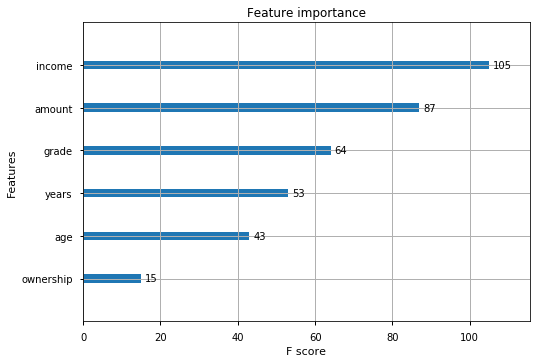

In [19]:
#Variable Importance Plot
plt.style.use('seaborn-notebook')
xgb.plot_importance(model_xgboost)

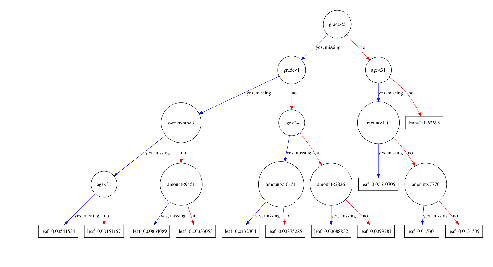

In [21]:
xgb.plot_tree(model_xgboost, num_trees=39)

In [22]:
# Prediction using xgboost

In [23]:
xgb_predict = model_xgboost.predict(xgb.DMatrix(X_test))

In [24]:
xgb_predict.shape

(1546,)

**Exercise**

1. Run the model for 200 trees  
2. Using that model, predict and observe the AUC on test
3. Now, predict only using the first 120 trees from that model. *Hint* : Use `ntree_limit` option  
4. Use `xgboost's` cross-validation method. Sample code:

```xgb.cv(parameters, train_matrix, num_round, nfold,
       metrics={'error'}, seed = 0,
       callbacks=[xgb.callback.print_evaluation(show_stdv=True)])```



**Early Stopping**

Source: [xgboost docs](http://xgboost.readthedocs.io/en/latest/python/python_intro.html)  

If you have a validation set, you can use early stopping to find the optimal number of boosting rounds.

`train(..., evals=evals, early_stopping_rounds=10)`

The model will train until the validation score stops improving. Validation error needs to decrease at least every early_stopping_rounds to continue training.

If early stopping occurs, the model will have three additional fields: `bst.best_score, bst.best_iteration and bst.best_ntree_limit`. Note that train() will return a model from the last iteration, not the best one.

This works with both metrics to minimize (RMSE, log loss, etc.) and to maximize (MAP, NDCG, AUC). Note that if you specify more than one evaluation metric the last one in param['eval_metric'] is used for early stopping.

### References

- https://www.analyticsvidhya.com/blog/2015/09/complete-guide-boosting-methods/
- https://www.analyticsvidhya.com/blog/2015/05/boosting-algorithms-simplified/
- https://xgboost.readthedocs.io/
